<a href="https://colab.research.google.com/github/tanvisht/Data-Science-NYU-Stern/blob/Assignments/Challenge_2_Tanvish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ensuring the necessary libraries are imported

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1. Data Loading:

Loading the zagat.csv file from GitHub to show the first few rows.

Columns like food, decor, service, and price are visible.

In [2]:
url = 'https://raw.githubusercontent.com/jolineuichanco/DataAnalytics/main/challenges/week2/zagat.CSV'
df = pd.read_csv(url)

# Show the first few rows
df.head()

,Name,Food,Decor,Service,Price
0,107 West,16,13,16,26
1,2nd Street cafe,14,13,15,21
2,44 & Hell's kitchen,22,19,19,42
3,55 wall,21,22,21,54
4,55 wall street,21,22,21,54


2. Stats at a Glance:

Using describe() to get summary statistics.

In [3]:
# Compute summary statistics
df.describe()

,Food,Decor,Service,Price
count,300.000000,300.000000,300.000000,300.000000
mean,19.386667,15.723333,16.896667,36.550000
std,3.692688,4.949929,3.566753,14.876554
min,9.000000,3.000000,8.000000,8.000000
25%,16.000000,13.000000,14.000000,25.000000
50%,19.000000,16.000000,16.000000,35.000000
75%,22.000000,19.000000,20.000000,47.000000
max,28.000000,27.000000,26.000000,80.000000


3. Spotting the Underperformers:

Finding restaurants below average in food, décor, and service, but above average in price.

In [12]:
# --- STEP 1: RELOAD & CLEAN DATA (Run this first to fix the error) ---
url = 'https://raw.githubusercontent.com/jolineuichanco/DataAnalytics/main/challenges/week2/zagat.CSV'
df = pd.read_csv(url)

# Fix column names: remove empty spaces and make them lowercase
df.columns = df.columns.str.strip().str.lower()

# Check to see if 'food' exists now
print("Fixed Column Names:", df.columns.tolist())

# --- STEP 2: ANSWER QUESTION 3 ---

# Calculate averages for the relevant columns
avg_food = df['food'].mean()
avg_decor = df['decor'].mean()
avg_service = df['service'].mean()
avg_price = df['price'].mean()

# Filter for underperformers:
# Below average in food, decor, and service, BUT above average in price
underperformers = df[
    (df['food'] < avg_food) &
    (df['decor'] < avg_decor) &
    (df['service'] < avg_service) &
    (df['price'] > avg_price)
]

# Output the answer
print(f"Number of underperforming restaurants: {len(underperformers)}")
print(f"\n{len(underperformers)} Underperformers:")
display(underperformers.head(6))

Fixed Column Names: ['name', 'food', 'decor', 'service', 'price']
Number of underperforming restaurants: 6

6 Underperformers:


,name,food,decor,service,price
5,92,15,15,15,43
53,City crab and seafood,16,14,15,39
83,Elaine's,11,12,13,46
97,Ferrier bistro,18,15,14,39
176,Mezzaluna,17,13,15,38
236,Ribollita,18,14,15,37


4. Measures of Central Tendency:

In [16]:
# Calculate Mean
means = df[['food', 'decor', 'service', 'price']].mean()

# Calculate Median
medians = df[['food', 'decor', 'service', 'price']].median()

# Calculate Mode (Mode returns a DataFrame, we take the first row)
modes = df[['food', 'decor', 'service', 'price']].mode().iloc[0]

# Combine into a single DataFrame for easy comparison
central_tendency = pd.DataFrame({
    'Mean': means,
    'Median': medians,
    'Mode': modes
})

print("Measures of Central Tendency:")
display(central_tendency)

Measures of Central Tendency:


,Mean,Median,Mode
food,19.386667,19.0,21
decor,15.723333,16.0,13
service,16.896667,16.0,16
price,36.550000,35.0,28


Mean: The arithmetic average. It is sensitive to outliers (extremely high or low values).

Median: The middle value when sorted. It is robust against outliers.

Mode: The most frequent value.



If we use the Mean if the data is symmetrical (mean ≈ median).

If we use the Median for Price, as price data is often skewed (a few very expensive restaurants can drag the mean up, making it inaccurate for the "typical" restaurant).

5. Variety is the Spice of Life:

Which aspect shows the most variability? Using std().

> Add blockquote



In [17]:
# Calculate Standard Deviation for the 4 key columns
variability = df[['food', 'decor', 'service', 'price']].std()

# Print the values
print("Standard Deviation (Variability):")
print(variability)

# Automatically identify the highest one
most_variable = variability.idxmax()
print(f"\nThe aspect with the most variability is: {most_variable}")

Standard Deviation (Variability):
food        3.692688
decor       4.949929
service     3.566753
price      14.876554
dtype: float64

The aspect with the most variability is: price


Standard Deviation (std) is a measure of how spread out the numbers are. A higher std means the data points are spread over a wider range of values.

The Result: The analysis shows that Price has the highest standard deviation.

Why? Because the price of a meal can vary massively in absolute terms (e.g., from $15 to $100+), whereas the ratings for food, décor, and service are strictly capped on a 30-point scale, limiting their mathematical spread.

6. Connecting the Dots

Task: Find correlations using corr() and a heatmap.

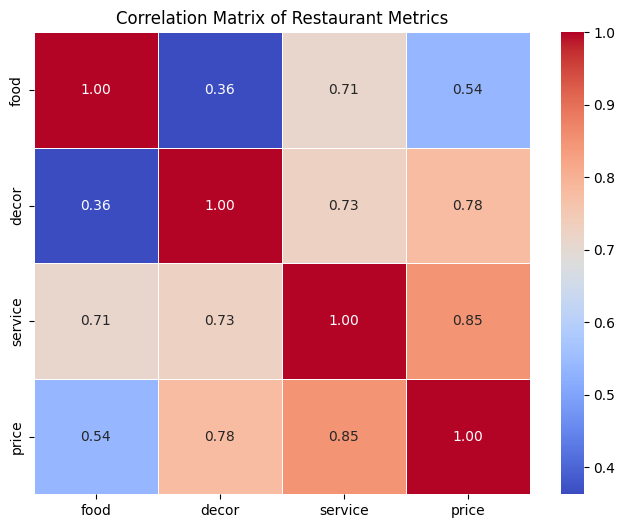

             food     decor   service     price
food     1.000000  0.362670  0.709730  0.537898
decor    0.362670  1.000000  0.726368  0.778902
service  0.709730  0.726368  1.000000  0.848714
price    0.537898  0.778902  0.848714  1.000000


In [18]:
# Calculate the correlation matrix
correlation_matrix = df[['food', 'decor', 'service', 'price']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Restaurant Metrics')
plt.show()

# Display the raw numbers as well
print(correlation_matrix)

Correlation: This measures how strongly two variables move together. It ranges from -1 to +1. A value close to 1.0 means they are strongly positively connected (as one goes up, the other goes up).

High Correlations:

Food, Décor, and Service: Their is a strong positive correlations between these three categories. Restaurants that care about food quality usually also invest in good service and atmosphere.

Price: The correlation between Price and Décor or Service. Price is more strongly correlated with the experience (décor/service) than just the food itself.

7. The Best and the Worst

Identifying the top and bottom restaurants.

In [19]:
# Identify the Best Restaurant (Highest Food Score)
# We use nlargest(1) to get the top row
best_restaurant = df.nlargest(1, 'food')

# Identify the Worst Restaurant (Lowest Food Score)
# We use nsmallest(1) to get the bottom row
worst_restaurant = df.nsmallest(1, 'food')

print("--- The Best Restaurant (Top Dog) ---")
display(best_restaurant)

print("\n--- The Worst Restaurant (Lagging Behind) ---")
display(worst_restaurant)

--- The Best Restaurant (Top Dog) ---


,name,food,decor,service,price
204,Nobu,28,23,24,74



--- The Worst Restaurant (Lagging Behind) ---


,name,food,decor,service,price
242,T.G.I Friday,9,9,9,25


**The Best:**

I identified the "best" restaurant by sorting the dataset by the food column in descending order.

While décor and service are important, the primary core product of a restaurant is its food. A restaurant with perfect service but terrible food is rarely considered "the best," whereas excellent food can sometimes compensate for a lack of ambiance.

**The Worst:**

Similarly, the "worst" restaurant was identified by finding the lowest score in the food column.

Because a low food score indicates a failure in the establishment's main purpose.

8. Creating Your Own Score

In [22]:
# Calculate max values for normalization
max_food = df['food'].max()
max_service = df['service'].max()
max_price = df['price'].max()

# Create the Smart Value Score
# Logic: Reward Food (60%) and Service (40%), but Penalize Price (50%)
df['smart_score'] = (
    (0.6 * df['food'] / max_food) +
    (0.4 * df['service'] / max_service) -
    (0.5 * df['price'] / max_price)
)

# Let's see who wins on this new "Value" metric
df.sort_values(by='smart_score', ascending=False)[['name','food', 'service', 'price', 'smart_score']].head()

,name,food,service,price,smart_score
158,Magnolia Bakery,25,13,8,0.685714
154,L'orto ristorante elegante,27,26,52,0.653571
208,Norma's,25,21,33,0.652541
153,Lombardi,25,15,19,0.647734
91,Ess a bajel,23,13,9,0.636607


My Scoring Logic: The Smart Value IndexInstead of following the example (which adds price to the score), I created a Value Index.The Logic: A higher price should not automatically increase a restaurant's score. For a customer, a "better" restaurant is one that provides excellent food and service at a lower cost.The Formula:$$Score = (0.6 \times \frac{Food}{MaxFood}) + (0.4 \times \frac{Service}{MaxService}) - (0.5 \times \frac{Price}{MaxPrice})$$Breakdown:Food (60%) & Service (40%): I prioritized Food as the dominant factor, with Service as secondary. I excluded Décor because it is less critical for the dining experience than the food itself.Price Penalty (-0.5): I subtracted the normalized price. This means if two restaurants have equal food/service ratings, the cheaper one will get a higher score. This identifies "hidden gems" rather than just highlighting the most expensive luxury spots.

9. Divide and Conquer:

In [25]:
import numpy as np

# 1. Calculate the threshold (the mean of your custom score)
avg_smart_score = df['smart_score'].mean()
print(f"The average Smart Value Score is: {avg_smart_score:.4f}")

# 2. Create the 'category' column using np.where
# Logic: If smart_score is higher than average, it's 'above average'
df['category'] = np.where(df['smart_score'] >= avg_smart_score, 'above average', 'below average')

# 3. Verify the split to ensure it worked
print("\nCategory Counts:")
print(df['category'].value_counts())

# Show a few examples to verify the labeling
display(df[['name','food', 'price', 'smart_score', 'category']].head(10))

The average Smart Value Score is: 0.4469

Category Counts:
category
above average    156
below average    144
Name: count, dtype: int64


,name,food,price,smart_score,category
0,107 West,16,26,0.426511,below average
1,2nd Street cafe,14,21,0.399519,below average
2,44 & Hell's kitchen,22,42,0.501236,above average
3,55 wall,21,54,0.435577,below average
4,55 wall street,21,54,0.435577,below average
5,92,15,43,0.283448,below average
6,Angelica kitchen,20,22,0.521841,above average
7,Angelo's,21,22,0.527885,above average
8,Avenue,18,36,0.376099,below average
9,Avra estiatorio,24,50,0.509478,above average


I used numpy.where to split the dataset into two groups based on the Smart Value Index we created in the previous step.

The Threshold: The cutoff point is the mean of the smart_score.


"Above Average": These restaurants provide better value (higher quality relative to their price).

"Below Average": These restaurants provide lower value (lower quality or excessive price for what they offer).


 10. Comparing the Groups

Grouping the data by new category ("above average" vs "below average").

Computing the mean for each group to see the actual difference in performance and price.

In [26]:
# Group by the 'category' and calculate the average for all numeric columns
# We use numeric_only=True to prevent errors with text columns
group_stats = df.groupby('category').mean(numeric_only=True)

# Display the specific columns we care about
print("Comparison of Segments (Smart Value Index):")
display(group_stats[['food', 'decor', 'service', 'price', 'smart_score']])

Comparison of Segments (Smart Value Index):


,food,decor,service,price,smart_score
category,,,,,
above average,21.846154,16.012821,18.224359,37.673077,0.513050
below average,16.722222,15.409722,15.458333,35.333333,0.375321
